<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_1_2_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_1.2'

In [4]:
os.listdir(base_path)

['data_add_delta_1.2_n20.csv',
 'data_add_delta_1.2_n30.csv',
 'data_add_delta_1.2_n60.csv',
 'data_add_delta_1.2_n120.csv',
 'data_add_delta_1.2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_1.2_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,81.587293,96.297561,38.010761,-263.551729,-37.656114,266.075019,-303.731133
1,0.0,1.0,38.163468,84.660978,72.667706,-47.611800,157.880352,289.677038,-131.796686
2,0.0,2.0,91.836110,70.225203,49.553385,303.442753,525.057451,250.616868,274.440583
3,0.0,3.0,54.324941,33.292196,80.326203,-119.769595,58.173744,187.733705,-129.559961
4,0.0,4.0,36.738616,89.302604,57.875330,148.920919,342.837469,239.502374,103.335095
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,53.133763,82.474878,80.829506,-150.722647,75.715499,128.033078,-52.317579
19996,999.0,16.0,40.993713,38.010195,29.629979,120.246256,238.880143,60.464830,178.415313
19997,999.0,17.0,72.306823,30.609645,34.899855,-73.745150,74.071173,163.750149,-89.678976
19998,999.0,18.0,32.154214,78.187053,73.064726,-442.130824,-248.724831,73.936186,-322.661017


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,81.587293,96.297561,38.010761,-263.551729,-37.656114,266.075019,-303.731133
1,0.0,1.0,38.163468,84.660978,72.667706,-47.611800,157.880352,289.677038,-131.796686
2,0.0,2.0,91.836110,70.225203,49.553385,303.442753,525.057451,250.616868,274.440583
3,0.0,3.0,54.324941,33.292196,80.326203,-119.769595,58.173744,187.733705,-129.559961
4,0.0,4.0,36.738616,89.302604,57.875330,148.920919,342.837469,239.502374,103.335095
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,53.133763,82.474878,80.829506,-150.722647,75.715499,128.033078,-52.317579
19996,999.0,16.0,40.993713,38.010195,29.629979,120.246256,238.880143,60.464830,178.415313
19997,999.0,17.0,72.306823,30.609645,34.899855,-73.745150,74.071173,163.750149,-89.678976
19998,999.0,18.0,32.154214,78.187053,73.064726,-442.130824,-248.724831,73.936186,-322.661017


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...       y_hat       e_hat
rep   index                        ...                        
0.0   0.0    81.587293  96.297561  ...  266.075019 -303.731133
      1.0    38.163468  84.660978  ...  289.677038 -131.796686
      2.0    91.836110  70.225203  ...  250.616868  274.440583
      3.0    54.324941  33.292196  ...  187.733705 -129.559961
      4.0    36.738616  89.302604  ...  239.502374  103.335095
...                ...        ...  ...         ...         ...
999.0 15.0   53.133763  82.474878  ...  128.033078  -52.317579
      16.0   40.993713  38.010195  ...   60.464830  178.415313
      17.0   72.306823  30.609645  ...  163.750149  -89.678976
      18.0   32.154214  78.187053  ...   73.936186 -322.661017
      19.0   28.379792  23.180328  ...  186.349498  -39.027792

[20000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...       y_hat       e_hat
rep   index                        ...                        
0.0   0.0    81.587293  96.297561  ...  266.075019 -303.731133
      1.0    38.163468  84.660978  ...  289.677038 -131.796686
      2.0    91.836110  70.225203  ...  250.616868  274.440583
      3.0    54.324941  33.292196  ...  187.733705 -129.559961
      4.0    36.738616  89.302604  ...  239.502374  103.335095
...                ...        ...  ...         ...         ...
999.0 15.0   53.133763  82.474878  ...  128.033078  -52.317579
      16.0   40.993713  38.010195  ...   60.464830  178.415313
      17.0   72.306823  30.609645  ...  163.750149  -89.678976
      18.0   32.154214  78.187053  ...   73.936186 -322.661017
      19.0   28.379792  23.180328  ...  186.349498  -39.027792

[20000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,81.587293,96.297561,38.010761,-263.551729,-37.656114,266.075019,-303.731133
1,0.0,1.0,38.163468,84.660978,72.667706,-47.611800,157.880352,289.677038,-131.796686
2,0.0,2.0,91.836110,70.225203,49.553385,303.442753,525.057451,250.616868,274.440583
3,0.0,3.0,54.324941,33.292196,80.326203,-119.769595,58.173744,187.733705,-129.559961
4,0.0,4.0,36.738616,89.302604,57.875330,148.920919,342.837469,239.502374,103.335095
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,53.133763,82.474878,80.829506,-150.722647,75.715499,128.033078,-52.317579
19996,999.0,16.0,40.993713,38.010195,29.629979,120.246256,238.880143,60.464830,178.415313
19997,999.0,17.0,72.306823,30.609645,34.899855,-73.745150,74.071173,163.750149,-89.678976
19998,999.0,18.0,32.154214,78.187053,73.064726,-442.130824,-248.724831,73.936186,-322.661017


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...       y_hat       e_hat
rep   index                        ...                        
0.0   0.0    81.587293  96.297561  ...  266.075019 -303.731133
      1.0    38.163468  84.660978  ...  289.677038 -131.796686
      2.0    91.836110  70.225203  ...  250.616868  274.440583
      3.0    54.324941  33.292196  ...  187.733705 -129.559961
      4.0    36.738616  89.302604  ...  239.502374  103.335095
...                ...        ...  ...         ...         ...
999.0 15.0   53.133763  82.474878  ...  128.033078  -52.317579
      16.0   40.993713  38.010195  ...   60.464830  178.415313
      17.0   72.306823  30.609645  ...  163.750149  -89.678976
      18.0   32.154214  78.187053  ...   73.936186 -322.661017
      19.0   28.379792  23.180328  ...  186.349498  -39.027792

[20000 rows x 7 columns]

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]

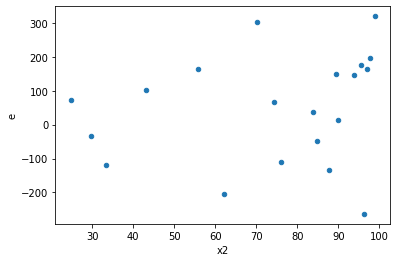

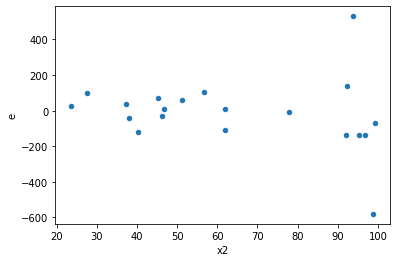

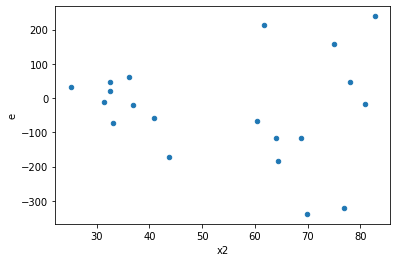

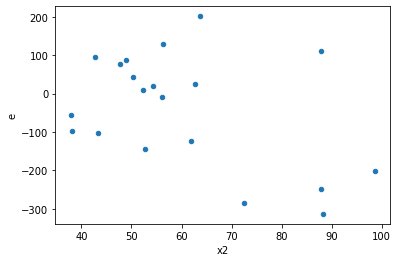

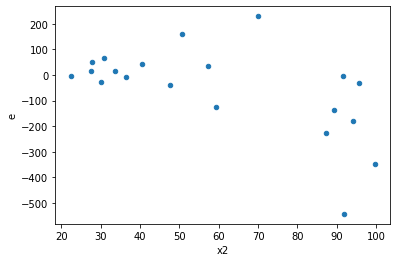

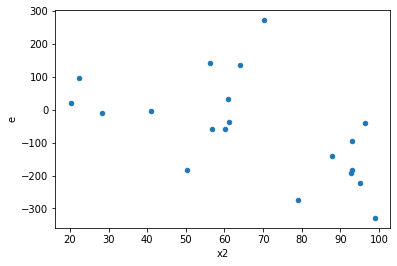

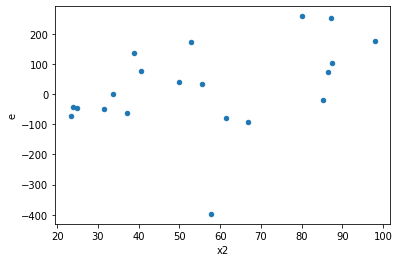

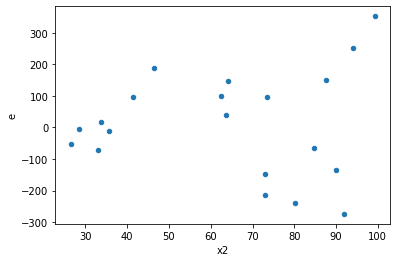

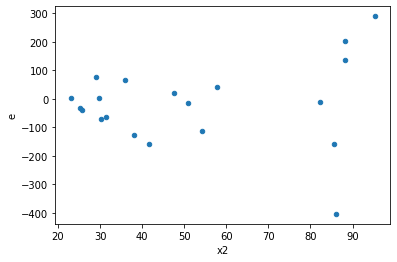

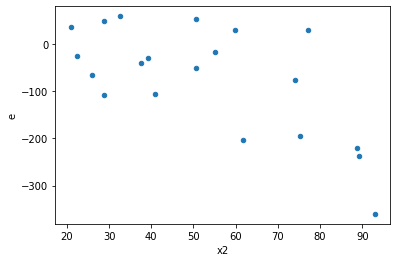

In [13]:
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,5.0,5.0,118423.31838497416,64006.55071918181,29605.82959624354,16001.637679795453,1.8501749751292946,0.5158337822299797,0.7420831088850102,Reject001=1 : Homoscedasticity
1.0,5.0,5.0,614770.5589466668,23543.36315790226,153692.6397366667,5885.840789475565,26.11226589945884,0.0027272955577228863,0.9986363522211386,Reject001=0 : Heteroscedasticity
2.0,5.0,5.0,171142.4153572044,5021.924810674237,42785.6038393011,1255.4812026685593,34.07904773752019,0.0014454860617516552,0.9992772569691242,Reject001=0 : Heteroscedasticity
3.0,5.0,5.0,152075.10433087594,16921.193224552586,38018.776082718985,4230.2983061381465,8.987256531662055,0.03084309855448142,0.9845784507227593,Reject001=1 : Homoscedasticity
4.0,5.0,5.0,69563.17834952277,6013.978374462607,17390.794587380693,1503.4945936156516,11.566915279395024,0.017778233526849707,0.9911108832365751,Reject001=1 : Homoscedasticity
5.0,5.0,5.0,60245.21800681024,47948.72342207994,15061.30450170256,11987.180855519984,1.2564509273059787,0.8083014807429378,0.5958492596285311,Reject001=1 : Homoscedasticity
6.0,5.0,5.0,54631.03351804722,19628.267797140372,13657.758379511804,4907.066949285093,2.7832834808788562,0.2856443317978785,0.8571778341010607,Reject001=1 : Homoscedasticity
7.0,5.0,5.0,272720.2311842628,21229.774598191234,68180.0577960657,5307.4436495478085,12.846119958687568,0.014068484094816425,0.9929657579525918,Reject001=1 : Homoscedasticity
8.0,5.0,5.0,157831.217300707,8762.447737328632,39457.80432517675,2190.611934332158,18.012229234570512,0.006509117535067999,0.996745441232466,Reject001=0 : Heteroscedasticity


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,5.0,118423.31838497416,64006.55071918181,29605.82959624354,16001.637679795453,1.8501749751292946,1.4841662177700203,Reject001=1 : Homoscedasticity
1.0,5.0,5.0,614770.5589466668,23543.36315790226,153692.6397366667,5885.840789475565,26.11226589945884,0.0027272955577228863,Reject001=0 : Heteroscedasticity
2.0,5.0,5.0,171142.4153572044,5021.924810674237,42785.6038393011,1255.4812026685593,34.07904773752019,0.0014454860617516552,Reject001=0 : Heteroscedasticity
3.0,5.0,5.0,152075.10433087594,16921.193224552586,38018.776082718985,4230.2983061381465,8.987256531662055,0.03084309855448142,Reject001=1 : Homoscedasticity
4.0,5.0,5.0,69563.17834952277,6013.978374462607,17390.794587380693,1503.4945936156516,11.566915279395024,0.017778233526849707,Reject001=1 : Homoscedasticity
5.0,5.0,5.0,60245.21800681024,47948.72342207994,15061.30450170256,11987.180855519984,1.2564509273059787,1.1916985192570622,Reject001=1 : Homoscedasticity
6.0,5.0,5.0,54631.03351804722,19628.267797140372,13657.758379511804,4907.066949285093,2.7832834808788562,0.2856443317978785,Reject001=1 : Homoscedasticity
7.0,5.0,5.0,272720.2311842628,21229.774598191234,68180.0577960657,5307.4436495478085,12.846119958687568,0.014068484094816425,Reject001=1 : Homoscedasticity
8.0,5.0,5.0,157831.217300707,8762.447737328632,39457.80432517675,2190.611934332158,18.012229234570512,0.006509117535067999,Reject001=0 : Heteroscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      755
Reject001=0 : Heteroscedasticity    245
Name: Result_test, dtype: int64